# Trabajo Práctico 2 FMPS ##

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile

## Ejercicio 1 - Generación de señales 
Generaremos muestras a partir de la siguiente señal continua

\begin{eqnarray}
    \label{x}
    x(t) = \sin(2\pi f_0 t) + \cos(2\pi f_1 t)
\end{eqnarray}

donde  $f_0 = 2$Hz y $f_1 = 3f_0$.

**1.1** Implemente una función  def $x(t)$   que devuelve los valores de $x(t)$ de una lista de valores en formato numpy.

In [5]:
f0 = 2 
f1 = 3*f0 
def x(t):
    return np.sin(2*np.pi*f0*t)+np.cos(2*np.pi*f1*t)

**1.2** Genere una señal con un muestreo fino a una frecuencia de muestreo $f_{s0} = 1000$Hz sobre $N_0 = 1024$ muestras:

- Genere un arreglo $t_0$ de $N$ muestras temporales de valores $t = \frac{n}{f_{s0}}$.
        
- Evalue la función $x$ en el vector de tiempo $t_0$ y almacene los valores resultantes $x [n]$ en un vector $x_0$.
        
- Trace la señal con el eje de tiempo correcto en segundos.

Text(0.5, 0, 't0 [s]')

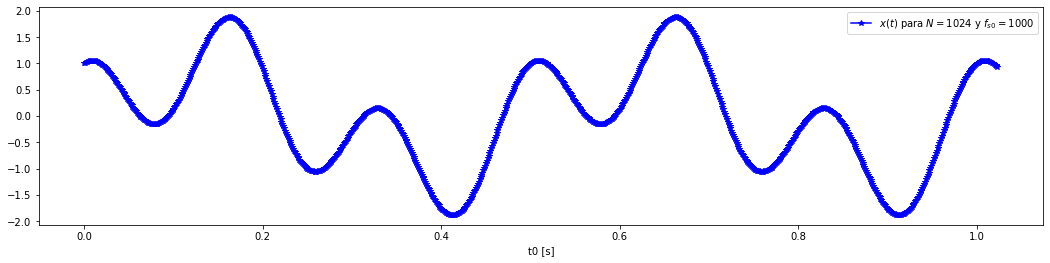

In [6]:
N0 = 2**10  # 1024
fs0 = 1000

step = 1./fs0
init = 0
end = step*N0
t0 = np.arange(init, end, step)

x0 = x(t0)

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(t0, x0, 'b-*',  label='$x(t)$ para $N=1024$ y $f_{s0}=1000$')
ax.legend()
ax.set_xlabel('t0 [s]')

**1.3** Genere una señal  $x_n$ con una frecuencia de muestreo $f_s = 20$ sobre $N = f_s$ muestras (muestreo de 1 segundo).

(20,)


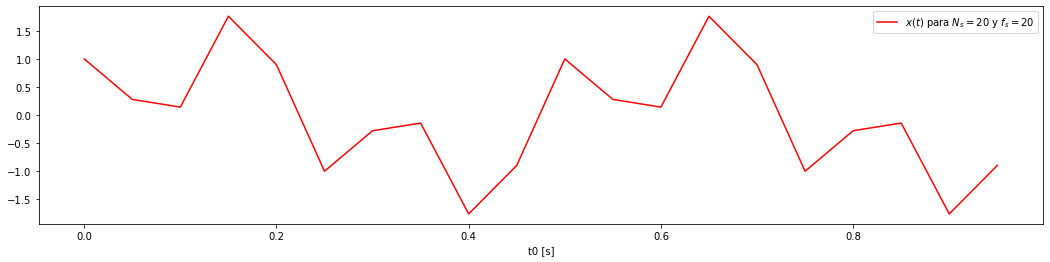

In [7]:
fs = 20
Ns = fs

step = 1./fs
init = 0
end = step * Ns
tn = np.arange(init, end, step)


xn = x(tn)

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(tn, xn, 'r-',  label='$x(t)$ para $N_{s}=20$ y $f_{s}=20$')
ax.legend()
ax.set_xlabel('t0 [s]')
print(xn.shape)

**1.4** Grafique simultáneamente $x_0$ y $x_n$. Para $x_n$, use el estilo de trazado ``-o'' para ver la posición de las muestras.

Text(0.5, 0, 't0 [s]')

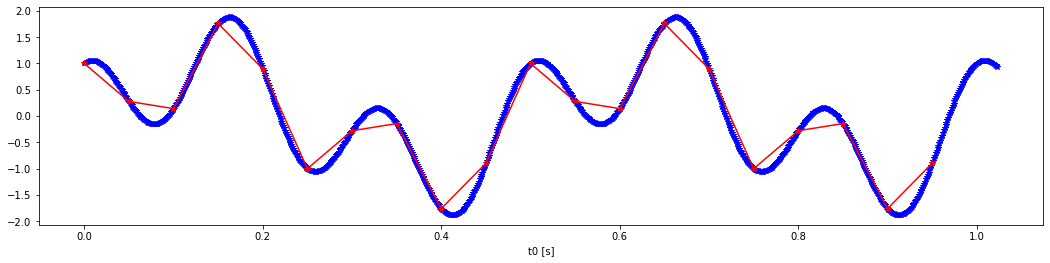

In [8]:
fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(t0, x0, 'b-*',  label='$x(t)$ para $N=1024$ y $f_{s0}=1000$')
ax.plot(tn, xn, 'r-*',  label='$x(t)$ para $N=20$ y $f_{s}=20$')
ax.set_xlabel('t0 [s]')

 Ejercicio 2 - Reconstrucción de señales
 ---------------
 
 **2.1**¿Cuál es la frecuencia de muestreo necesaria $f_{s}$ para garantizar que la señal x(t) puede reconstruirse?
 
 Definimos una señal $f$ (con transformada de Fourier) con soporte compacto en el intervalo $[-\pi/T, \pi/T]$. Entonces usando el Teorema Nyquist-Shannon tenemos que $f$ puede ser reconstruida interpolando las muestras usando una distancia de $T$, tal que así,

$$
f(t)=\sum_{n \in X}f(nT)h_T(t-nT).
$$
Donde $h_T(t)$ es el seno cardinal, con esto podemos calcular 
$$
\hat{x}(\omega) = \frac{1}{2}[i(\delta (\omega - 4\pi) - \delta ( \omega + 4\pi)) + ( \delta (\omega + 12\pi) + \delta (\omega - 12\pi))]
$$
Con lo que tenemos $f_s = 12Hz$.

**2.2** Programe una función def recsinc($x_{s}$,$t_{s}$,$f_{s}$,$t$) que recosntruya una señal en el tiempo t a partir de muestras $x_{s}$,$t_{s}$ a la frecuencia $f_{s}$

In [9]:
def recsinc(xs, ts, fs, t):
    r = []
    for i in t:
        np.array(r.append(np.sum(xs*np.sinc(np.pi*fs*(i - ts)))))
    return r

**2.3** Grafique simultaneamente $x_{0}$ y la interpolación de $x_{n}$ en $t_{0}$ ¿ Qué pasa en el borde de la ventana de muestreo?

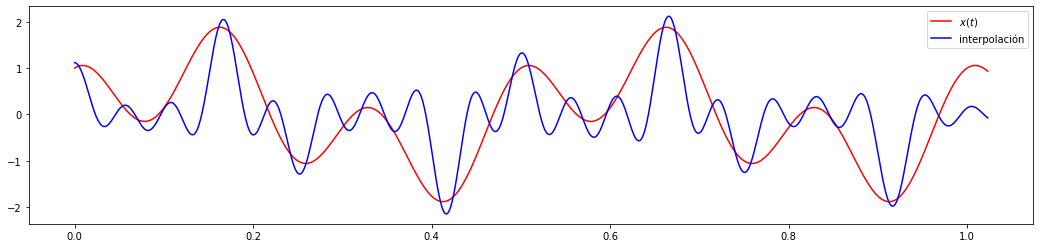

In [10]:
fs = 12 
ts = np.arange(0, 1, 1/fs)
xs = x(ts)

fig, ax = plt.subplots (1, figsize = (18, 4))
ax.plot(t0, x0, 'r-', label = '$x(t)$')
ax.plot(t0, recsinc(xs, ts, fs, t0), 'b-', label = 'interpolación')
ax.legend()

**2.4** Modifique la frecuencia de muestreo de $f_{s}=20$ a $f_{s}=10$.¿Qué sucede con la reconstrucción?

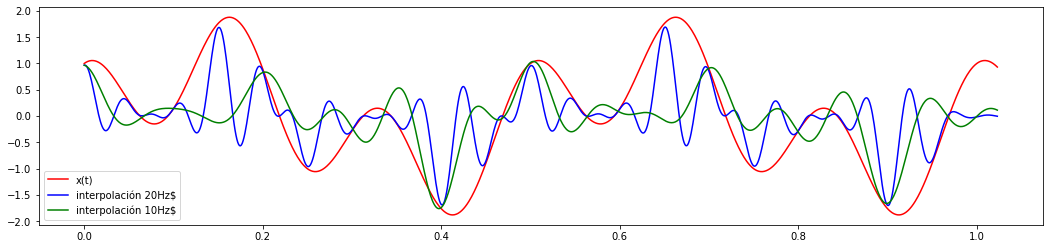

In [12]:
f20 = 20
t20 = np.arange(0, 1, 1/f20)
x20 = x(t20)
f10 = 10
t10 = np.arange(0, 1, 1/f10)
x10 = x(t10)
fig, ax = plt. subplots (1, figsize = (18, 4))
ax.plot(t0, x0, 'r-', label = 'x(t)')
ax.plot(t0, recsinc(x20, t20, f20, t0), 'b-', label = 'interpolación 20Hz$')
ax.plot(t0, recsinc(x10, t10, f10, t0), 'g-', label = 'interpolación 10Hz$')
ax.legend()

Se puede observar que en función en que aumentamos la frecuencia la reconstrucción es mejor, ergo veamos que pasa en el caso $f_s=60$ y $f_s=120$

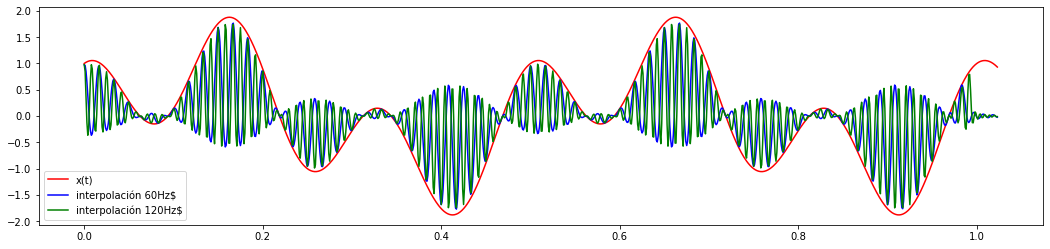

In [13]:
f60 = 60
t60 = np.arange(0, 1, 1/f60)
x60 = x(t60)
f120 = 120
t120 = np.arange(0, 1, 1/f120)
x120 = x(t120)
fig, ax = plt. subplots (1, figsize = (18, 4))
ax.plot(t0, x0, 'r-', label = 'x(t)')
ax.plot(t0, recsinc(x60, t60, f60, t0), 'b-', label = 'interpolación 60Hz$')
ax.plot(t0, recsinc(x120, t120, f120, t0), 'g-', label = 'interpolación 120Hz$')
ax.legend()

 Ejercicio 3 - Generacion de señales de audio
 ---------------

1. En esta parte trabajaremos con secuencias de audio.
2. Para hacer eso usaremos *librosa* para cargar y guardar archivos en formato .wav. 
3. También es posible escuchar audio directamente en Python usando la libreria de manipulacion audio *sounddevice* que se puede instalar con pip o conda.

*Nota: cuando se trabaja en un ambiente virtual o en un subsistema como WSL (Windows Subsystem Linux) es mas complicado, pero no imposible, escuchar audio directamente desde una consola Python o un notebook Jupyter, pues se requiere crear un servidor audio para que el sistema hosted pueda acceder a la tarjeta de sonido del sistema host.* 

En esta seccion las señales generadas solo seran escuchadas y trazadas, pero estudiaremos sus componentes de frecuencia en el siguiente TP.

**3.1** Genere 1 segundo de una onda sinusoidal de magnitud $0.5$ y de frecuencia $f_0 = 425$Hz muestreada a
$fs = 8000$Hz. Guardelo como un archivo *.wav* y escuche el archivo o escuche directamente la señal desde
python. Este es el tono de marcado de los teléfonos europeos.

Text(0, 0.5, 'amplitud')

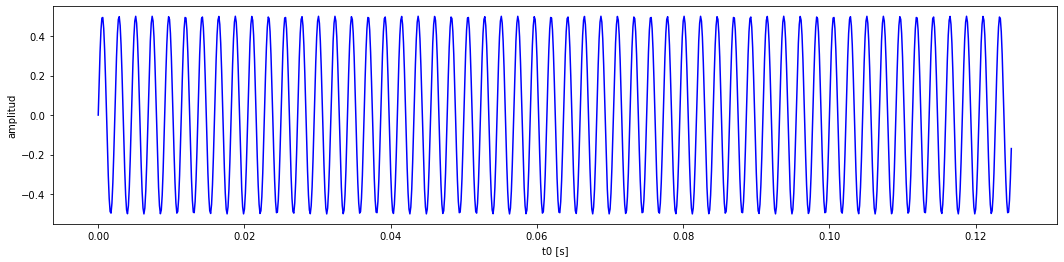

In [15]:
def nota(a, f, t):
    return a*np.sin(2*np.pi*f*t)


tw = np.arange(0, 1, 1./8000)
aw = 0.5
fw = 440

la440 = nota(a=aw, f=fw, t=tw)


wavfile.write(filename='la440.wav', rate=8000, data=la440)

fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(tw[:1000], la440[:1000], 'b-',  label='la 440')
ax.set_xlabel('t0 [s]')
ax.set_ylabel('amplitud')

**3.2** Es posible generar notas musicales a partir de su numero MIDI m donde la frecuencia se expresa como

$$f_m = 440 · 2^{\frac{m-69}{12}}$$.

Vemos que hay $12$ semitonos para pasar de una nota a su octava.

La nota MIDI $m = 69$ es la LA 4 en notacion europea y es el estandar de tono utilizado para afinar instrumentos para conciertos.


Implemente una funcion *def getNote (m, fs, l)* que devuelve la nota $m$ tocada durante $l$ segundos a la frecuencia $f_s$.

In [26]:
def getNote (m, fs, l):
    t = np.arange(0, l, 1./fs)
    f = 440*pow(2,((m-69)/12))
    return nota(a=.5, f=f, t=t)

In [27]:
wavfile.write(filename='A4_16kHz.wav', rate=8000, data=getNote(m=69, fs=16000, l=2))
wavfile.write(filename='A8_8kHz.wav', rate=8000, data=getNote(m=117, fs=8000, l=2))

**3.3** ¿Que sucede con el con m=117 a fs=8000? 

Claramente al estar 4 octavas más arriba es notablemente más agudo el nuevo tono

**3.4** Codifique una secuencia de concatenación de notas [70,72,68,56,63] (1 segundo de cada una) y guarde la secuencia como archivo "seq.wav".
.¿Le suena la secuencia?.

In [29]:
n70=getNote(m=70, fs=8000, l=1)
n72=getNote(m=72, fs=8000, l=1)
n68=getNote(m=68, fs=8000, l=1)
n56=getNote(m=56, fs=8000, l=1)
n63=getNote(m=63, fs=8000, l=1)
seq=np.concatenate((n70,n72,n68,n56,n63),axis=0)
wavfile.write(filename='seq.wav', rate=8000, data=seq)

Me suena a cuando no tienes señal o algo así me recuerda y una amiga me dijo que le sonaba al fax.

**3.5** La saturación puede ocurrir cuando los amplificadores alcanzan su máxima amplitud. El efecto
de la saturación puede ser reproducido usando un "clipeo" en un seno.
Compare la señal de la nota m=69 a 440 hz para diferentes valores de recorte. Guarde la nota usando el
"clipeo" en un archivo "A4clip.wav". ¿Cual es el efecto de la saturación en el contenido frecuencial de la señal?

**3.6** Genere la señal
\begin{equation}
    \label{x}
    x(t) = \sin(2\pi (w_{0}t+\frac{c}{2}t^2)) 
\end{equation}
con $f_{0}=100hz$ y c=500 durante 1 segundo a una frecuencia de muestreo $f_{s}=8000hz$. esta señal se llama 
"chirp" y corresponde a una mudalación de frecuencia. guarde la señal en el archivo "chirp.wap"

In [39]:
def señal(t, w0):
    return np.sin(2*np.pi*(w0*t+250*t*t))

In [40]:
tk = np.arange(0, 10, 1./8000)
fk = 100
w0k=2*np.pi*fk                   
wavfile.write(filename='chirp.wav', rate=8000, data=señal(tk,w0k))